In [1]:
import scipy
scipy.__version__
from scipy import constants
constants.pi
constants.golden
constants.c, constants.speed_of_light
constants.h, constants.Planck

(6.62607015e-34, 6.62607015e-34)

In [2]:

import numpy as np
from scipy import linalg
linalg.inv(np.matrix([[1, 2], [3, 4]]))
U, s, Vh = linalg.svd(np.random.randn(5, 4))
U, s, Vh
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])
M = x[:, np.newaxis]**[0, 2]
M
p = linalg.lstsq(M, y)[0]
p

array([0.20925829, 0.12013861])

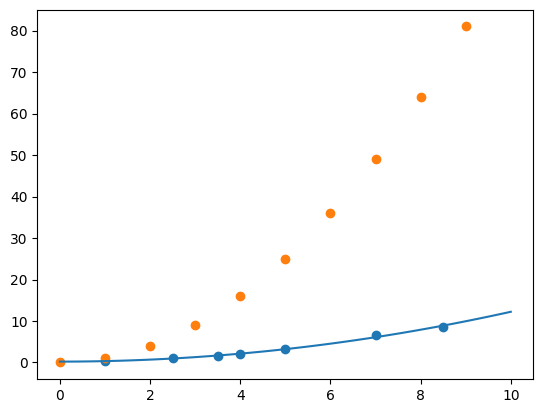

In [3]:

from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x, y)
xx = np.linspace(0, 10, 100)
yy = p[0] + p[1]*xx**2
plt.plot(xx, yy)
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([0, 1, 4, 9, 16, 25, 36, 49, 64, 81])
plt.scatter(x, y)

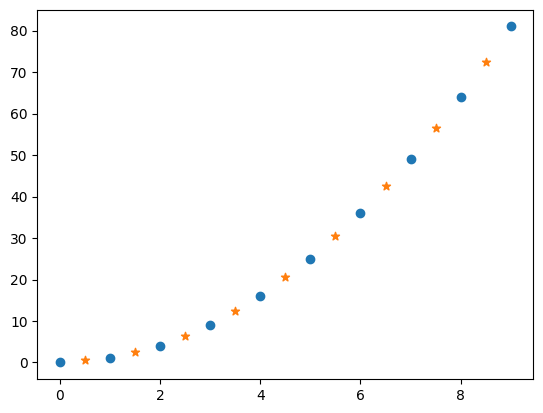

In [4]:

from scipy import interpolate
xx = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])
f = interpolate.interp1d(x, y)
yy = f(xx)
plt.scatter(x, y)
plt.scatter(xx, yy, marker='*')

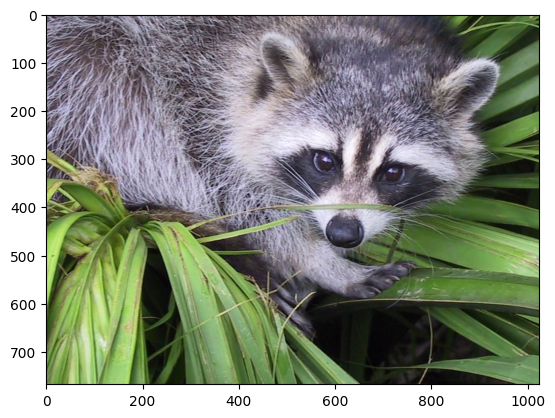

In [5]:

from scipy import misc
face = misc.face()
face
plt.imshow(face)

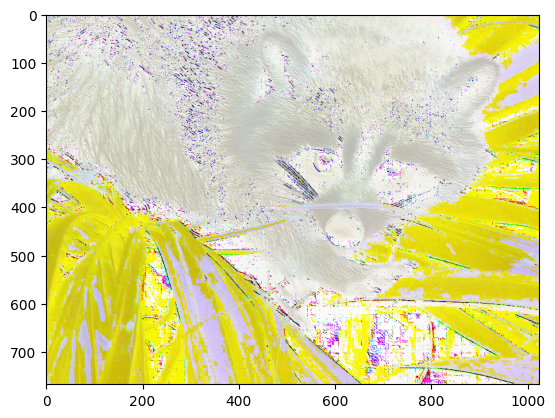

In [6]:

from scipy import ndimage
plt.imshow(ndimage.gaussian_filter(face, sigma=5))
plt.imshow(ndimage.rotate(face, 45))
k = np.random.randn(2, 2, 3)
plt.imshow(ndimage.convolve(face, k))

In [7]:

def func(p, x):
    w0, w1 = p
    f = w0 + w1*x*x
    return f

def err_func(p, x, y):
    ret = func(p, x) - y
    return ret

In [8]:
from scipy.optimize import leastsq

p_init = np.random.randn(2)  # Generate two random numbers
x = np.array([1, 2.5, 3.5, 4, 5, 7, 8.5])
y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])
# find the fitting parameters by using least square function provided by SciPy.
parameters = leastsq(err_func, p_init, args=(x, y))
parameters[0]

array([0.20925831, 0.12013861])

In [9]:
from scipy import signal

t = np.linspace(-1, 1, 100)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].plot(t, signal.gausspulse(t, fc=5, bw=0.5))
axes[0].set_title("gausspulse")
t *= 5*np.pi
axes[1].plot(t, signal.sawtooth(t))
axes[1].set_title("chirp")
axes[2].plot(t, signal.square(t))
axes[2].set_title("gausspulse")

Text(0.5, 1.0, 'gausspulse')

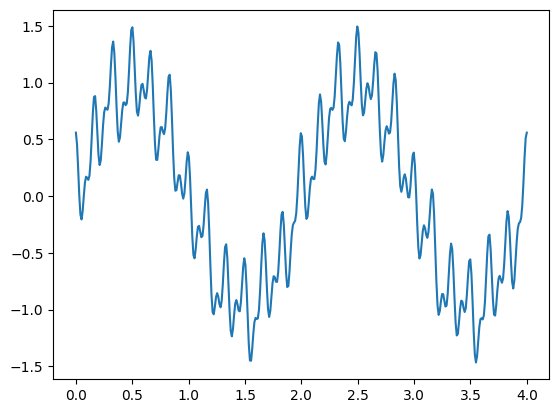

In [ ]:
def f(t): return np.sin(np.pi*t) + 0.1*np.cos(7*np.pi*t+0.3) + \
    0.2 * np.cos(24*np.pi*t) + 0.3*np.cos(12*np.pi*t+0.5)


t = np.linspace(0, 4, 400)
plt.plot(t, f(t))

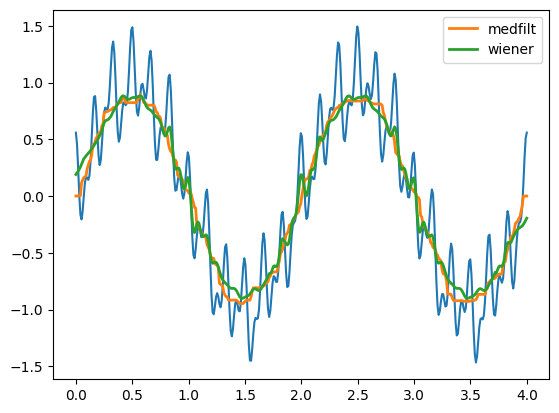

In [ ]:
plt.plot(t, f(t))
plt.plot(t, signal.medfilt(f(t), kernel_size=55), linewidth=2, label="medfilt")
plt.plot(t, signal.wiener(f(t), mysize=55), linewidth=2, label="wiener")
plt.legend()

(array([  2.,   7.,  49., 134., 242., 257., 198.,  74.,  31.,   6.]),
 array([-3.70272182, -2.999497  , -2.29627217, -1.59304734, -0.88982251,
        -0.18659768,  0.51662714,  1.21985197,  1.9230768 ,  2.62630163,
         3.32952646]),
 <BarContainer object of 10 artists>)

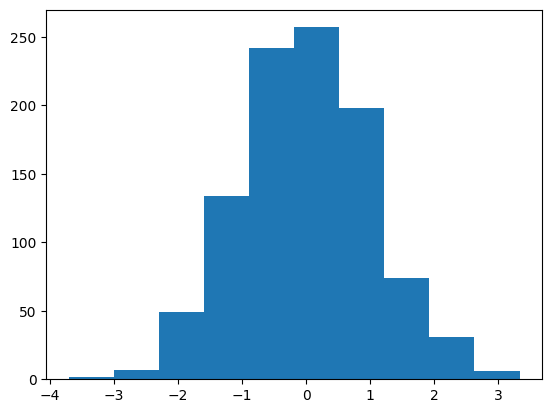

In [ ]:
from scipy.stats import norm

plt.hist(norm.rvs(size=1000))

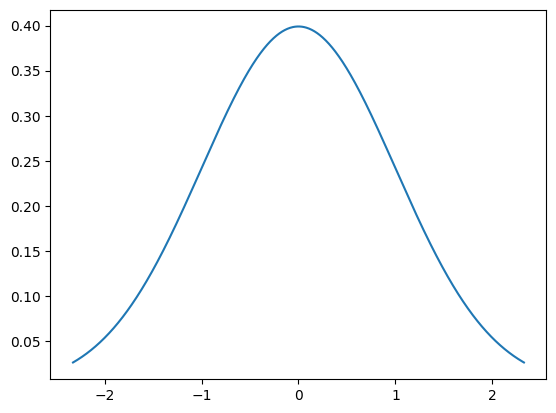

In [ ]:
x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
plt.plot(x, norm.pdf(x))

In [ ]:
from scipy.stats import describe

describe(x)

DescribeResult(nobs=1000, minmax=(-2.3263478740408408, 2.3263478740408408), mean=0.0, variance=1.809385737250562, skewness=9.356107558947013e-17, kurtosis=-1.2000024000024)

In [ ]:
from scipy.sparse import csr_matrix

array = np.array([[2, 0, 0, 3, 0, 0], [1, 0, 1, 0, 0, 2], [0, 0, 1, 2, 0, 0]])
csr = csr_matrix(array)
print(csr)

  (0, 0)	2
  (0, 3)	3
  (1, 0)	1
  (1, 2)	1
  (1, 5)	2
  (2, 2)	1
  (2, 3)	2


NameError: name 'csc' is not defined

In [ ]:
from scipy.sparse import csc_matrix

csc = csc_matrix(array)
print(csc)

  (0, 0)	2
  (1, 0)	1
  (1, 2)	1
  (2, 2)	1
  (0, 3)	3
  (2, 3)	2
  (1, 5)	2


In [ ]:
from scipy.stats import uniform

data = uniform.rvs(size=1000000, loc=0, scale=2).reshape(1000, 1000)
data[data < 1] = 0
data

array([[1.8246172 , 1.93290596, 1.5037143 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.4323888 , 0.        , ..., 1.76324462, 0.        ,
        0.        ],
       [1.24211128, 0.        , 1.34960919, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.65287977, 1.43068888, 1.25429065, ..., 1.49312311, 0.        ,
        1.05500845],
       [0.        , 1.48919623, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.48998937, 0.        , 1.96993954, ..., 1.0910782 , 0.        ,
        0.        ]])

In [ ]:
data.nbytes/(1024**2)

7.62939453125

In [ ]:
data_csr = csr_matrix(data)
data_csr.data.size/(1024**2)

0.47693824768066406